     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


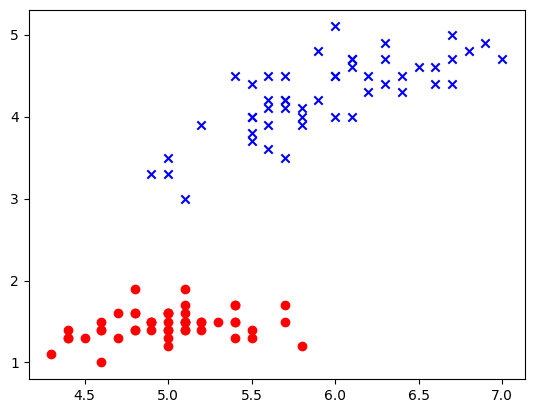

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Feb 22 21:30:32 2021

@author: AM4
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Считываем данные 
# df = pd.read_csv('https://archive.ics.uci.edu/ml/'
#     'machine-learning-databases/iris/iris.data', header=None)

df = pd.read_csv('data.csv')

# df.to_csv('data_err.csv', index=None)
    
# смотрим что в них
print(df.head())

# три столбца - это признаки, четвертый - ответы (то, что мы хотим предсказывать)

# возьмем перые 100 строк, 4-й столбец 
y = df.iloc[0:100, 4].values
print(y[0:10])

# так как ответы у нас строки - нужно перейти к численным значениям
y = np.where(y == "Iris-setosa", 1, -1)

# возьмем два признака, чтобы было удобне визуализировать задачу
X = df.iloc[0:100, [0, 2]].values

# Признаки в X, ответы в y - постмотрим на плоскости как выглядит задача (y==1)
plt.figure
plt.scatter(X[0:50, 0], X[0:50, 1], color='red', marker='o')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x')

# переходим к созданию нейрона
# функция нейрона:
# значение = w1*признак1+w2*признак2+w0
# ответ = 1, если значение > 0
# ответ = -1, если значение < 0

In [2]:
def neuron(w,x):
    if((w[1]*x[0]+w[2]*x[1]+w[0])>=0):
        predict = 1
    else: 
        predict = -1
    return predict

In [3]:
# проверим как это работает (веса зададим пока произвольно)
w = np.array([0, 0.1, 0.4])
print(neuron(w,X[1]))

1


In [4]:
# теперь создадим процедуру обучения
# сам нейрон перепишем в виде одной строки
predict = np.where((np.dot(X[1], w[1:]) + w[0]) >= 0.0, 1, -1)

In [5]:
# в соответствии с правилом Хебба корректировка веса производится по выражению:
# w_new = w_old + eta*x*y
# зададим начальные значения
w = np.zeros(1 + X.shape[1])
eta = 0.001
errors = 0
for xi, target, j in zip(X, y, range(X.shape[0])):
    predict = np.where((np.dot(xi, w[1:]) + w[0]) >= 0.0, 1, -1)
    # так как у нас входы не булевы,
    # то берем разницу ответа агоритма и правильного ответа
    w[1:] += (eta * (target - predict)) * xi
    w[0] += eta * (target - predict)
    errors += int((target - predict) != 0)
    print([w, errors, ])

[array([0., 0., 0.]), 0]
[array([0., 0., 0.]), 0]
[array([0., 0., 0.]), 0]
[array([0., 0., 0.]), 0]
[array([0., 0., 0.]), 0]
[array([0., 0., 0.]), 0]
[array([0., 0., 0.]), 0]
[array([0., 0., 0.]), 0]
[array([0., 0., 0.]), 0]
[array([0., 0., 0.]), 0]
[array([0., 0., 0.]), 0]
[array([0., 0., 0.]), 0]
[array([0., 0., 0.]), 0]
[array([0., 0., 0.]), 0]
[array([0., 0., 0.]), 0]
[array([0., 0., 0.]), 0]
[array([0., 0., 0.]), 0]
[array([0., 0., 0.]), 0]
[array([0., 0., 0.]), 0]
[array([0., 0., 0.]), 0]
[array([0., 0., 0.]), 0]
[array([0., 0., 0.]), 0]
[array([0., 0., 0.]), 0]
[array([0., 0., 0.]), 0]
[array([0., 0., 0.]), 0]
[array([0., 0., 0.]), 0]
[array([0., 0., 0.]), 0]
[array([0., 0., 0.]), 0]
[array([0., 0., 0.]), 0]
[array([0., 0., 0.]), 0]
[array([0., 0., 0.]), 0]
[array([0., 0., 0.]), 0]
[array([0., 0., 0.]), 0]
[array([0., 0., 0.]), 0]
[array([0., 0., 0.]), 0]
[array([0., 0., 0.]), 0]
[array([0., 0., 0.]), 0]
[array([0., 0., 0.]), 0]
[array([0., 0., 0.]), 0]
[array([0., 0., 0.]), 0]


In [7]:
# работает, но не очень здорово. Так происходит потому, что порядок имеет значение
# перемешаем индексы и создадим обучающую выборку заново
df = df.iloc[np.random.permutation(len(df))]
y = df.iloc[0:100, 4].values
y = np.where(y == "Iris-setosa", 1, -1)
X = df.iloc[0:100, [0, 2]].values
w = np.zeros(1 + X.shape[1])
eta = 0.001
errors = 0
w_iter = []

for xi, target, j in zip(X, y, range(X.shape[0])):
    predict = np.where((np.dot(xi, w[1:]) + w[0]) >= 0.0, 1, -1)
    w[1:] += (eta * (target - predict)) * xi
    w[0] += eta * (target - predict)
    errors += int((target - predict) != 0)
    w_iter.append(w.tolist())
    print([w, errors, ])

# попробуем визуализировать процесс обучения
xl=np.linspace(min(X[:,0]), max(X[:,0])) # координата x
plt.figure
plt.scatter(X[y==1, 0], X[y==1, 1], color='red', marker='o')
plt.scatter(X[y==-1, 0], X[y==-1, 1], color='blue', marker='x') 

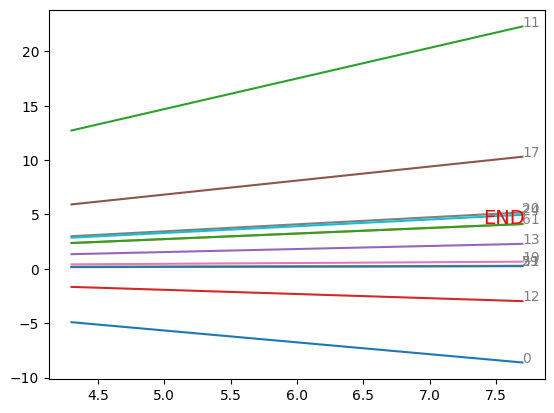

0

In [8]:
w_old = None
for i,w in zip(range(len(w_iter)), w_iter):
    if(w!=w_old):
        w_old = w
        yl = -(xl*w[1]+w[0])/w[2] # уравнение линии
        plt.plot(xl, yl) # строим разделяющую границу
        plt.text(xl[-1], yl[-1], i, dict(size=10, color='gray'))
    
yl = -(xl*w[1]+w[0])/w[2]
plt.plot(xl, yl)
plt.text(xl[-1]-0.3, yl[-1], 'END', dict(size=14, color='red'))
plt.show() 

# посчитаем ошибки
predict = np.where((np.dot(X, w[1:]) + w[0]) >= 0.0, 1, -1)
sum(predict-y)

In [9]:
# теперь можем повторять процедуру обучения несколько раз, 
# таким образом создадим эпохи обучения
n_iter = 5
errors_ = []
w = np.zeros(1 + X.shape[1])
eta = 0.001

errors_ = []
for i in range(n_iter):
    errors = 0
    for xi, target, j in zip(X, y, range(X.shape[0])):
        predict = np.where((np.dot(xi, w[1:]) + w[0]) >= 0.0, 1, -1)
        w[1:] += (eta * (target - predict)) * xi
        w[1] += eta * (target - predict)
        errors += int((target - predict) != 0)
        # print([w])
    errors_.append(errors)
    print(i, errors)
    
    
predict = np.where((np.dot(X, w[1:]) + w[0]) >= 0.0, 1, -1)
sum(predict-y)

# 

0 5
1 0
2 0
3 0
4 0


0